In [15]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from plotnine import *
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

%matplotlib inline

In [10]:
bk = pd.read_csv('bk_data.csv')
bk.head()

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers
0,Whopper® Sandwich,Burgers,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0
1,Whopper® Sandwich with Cheese,Burgers,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0,735.0
2,Bacon & Cheese Whopper® Sandwich,Burgers,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0,783.0
3,Double Whopper® Sandwich,Burgers,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0,883.0
4,Double Whopper® Sandwich with Cheese,Burgers,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0,963.0


# Two Dimensions

SILHOUETTE:  0.45869367820096907


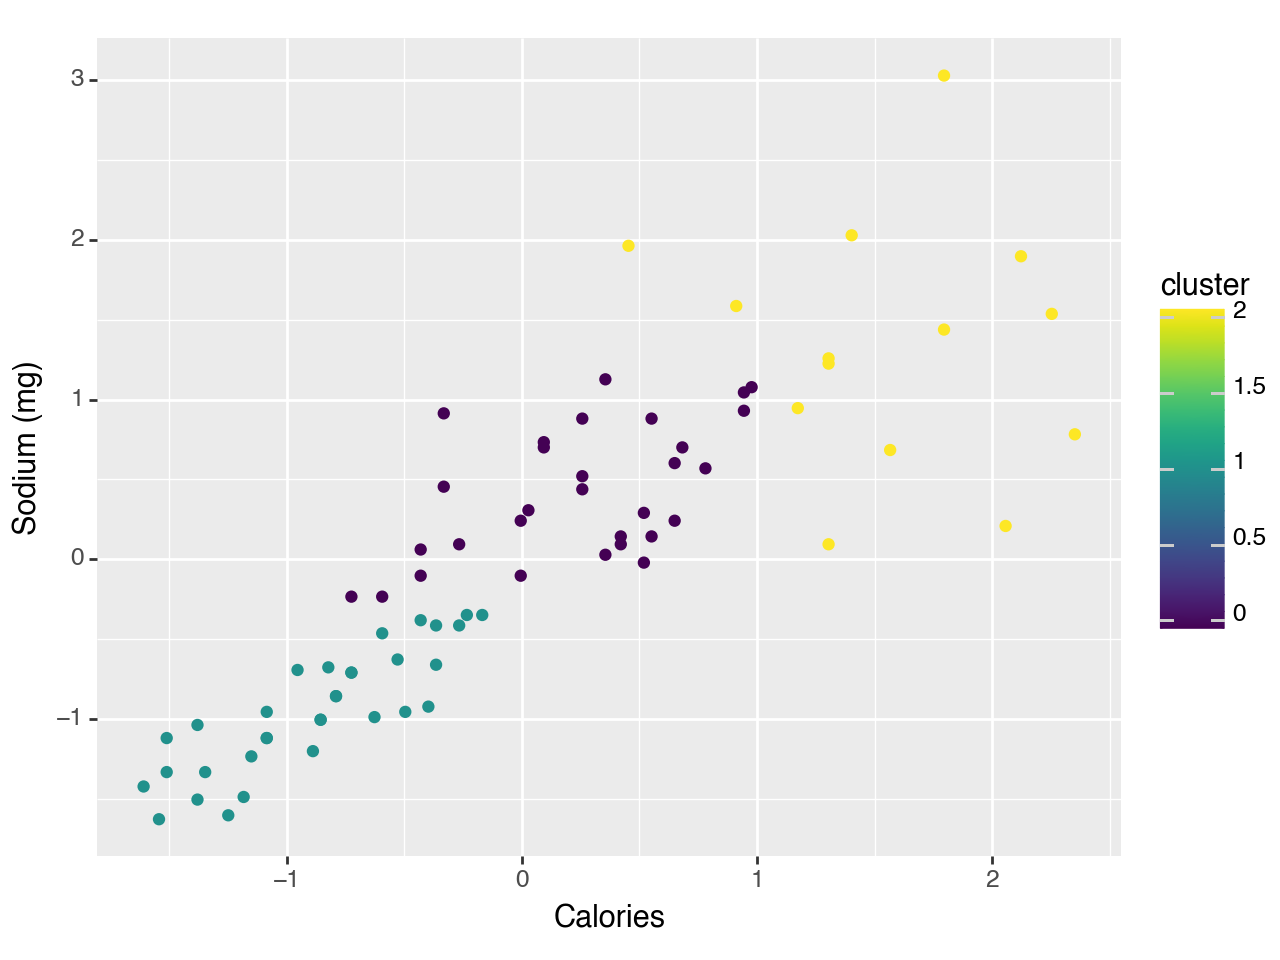

<Figure Size: (640 x 480)>

In [36]:
features = ['Calories','Sodium (mg)']
X = bk[features]

z = StandardScaler()

X = z.fit_transform(X)
X = pd.DataFrame(X, columns = features)

EM = GaussianMixture(n_components = 3)

EM.fit(X)

cluster = EM.predict(X)
print('SILHOUETTE: ', silhouette_score(X, cluster))

X['cluster'] = cluster

(ggplot(X, aes(x = 'Calories', y = "Sodium (mg)", color = 'cluster'))) + geom_point()

# cluster_p = EM.predict_proba(X)
# cluster_p

# Three Dimension

In [55]:
features = ['Sugars (g)','Protein (g)', 'Fat (g)']
X = bk[features]
z = StandardScaler()
X[features] = z.fit_transform(X)
EM = GaussianMixture(n_components=3)
EM.fit(X)
cluster = EM.predict(X)
X['cluster'] = cluster

print("Silhouette: ", silhouette_score(X,cluster))

Silhouette:  0.572231574644169


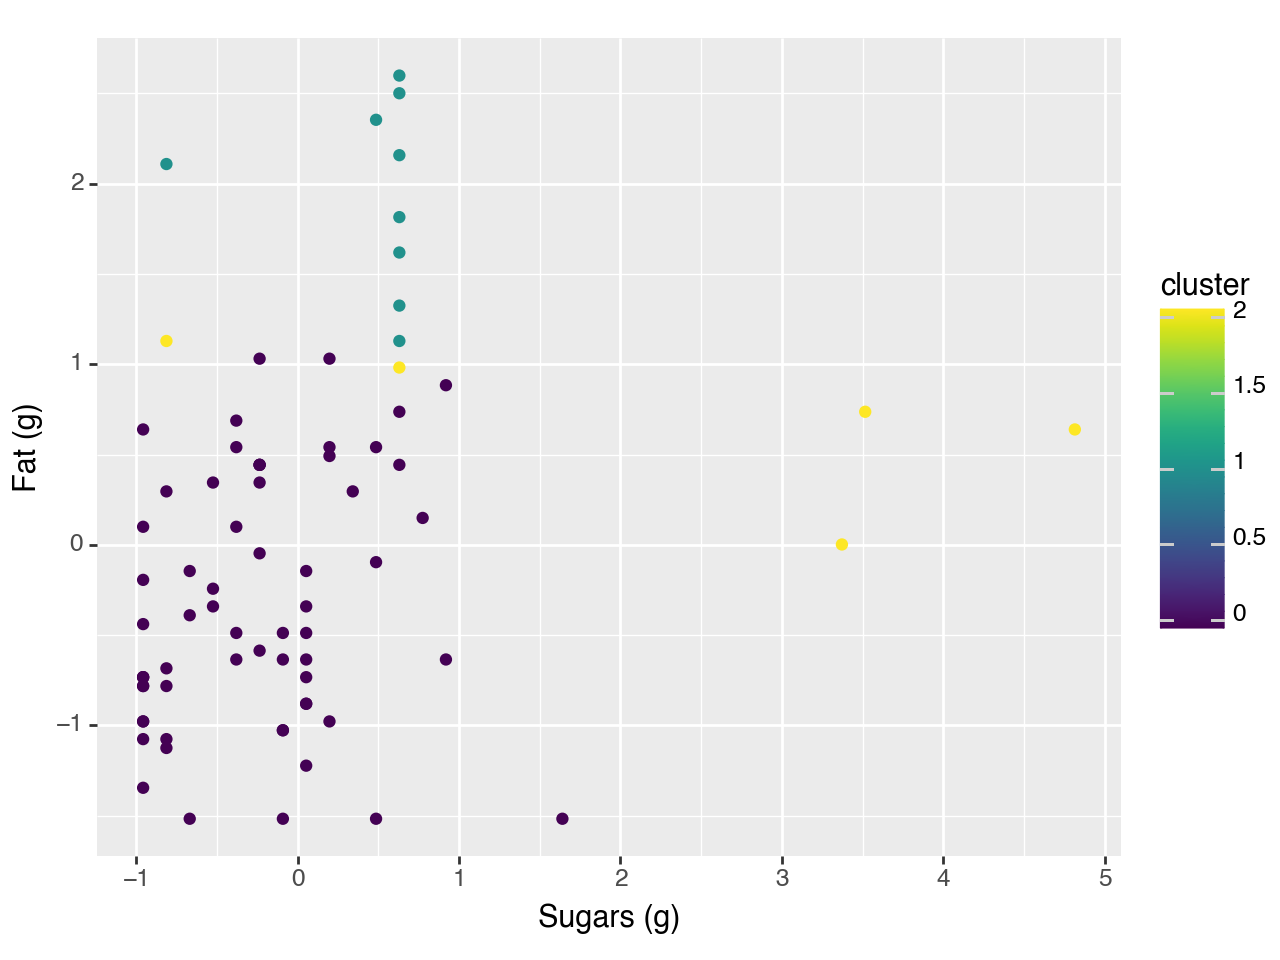

<Figure Size: (640 x 480)>

In [59]:
(ggplot(X, aes(x = "Sugars (g)", y = "Fat (g)", color = "cluster"))) + geom_point()

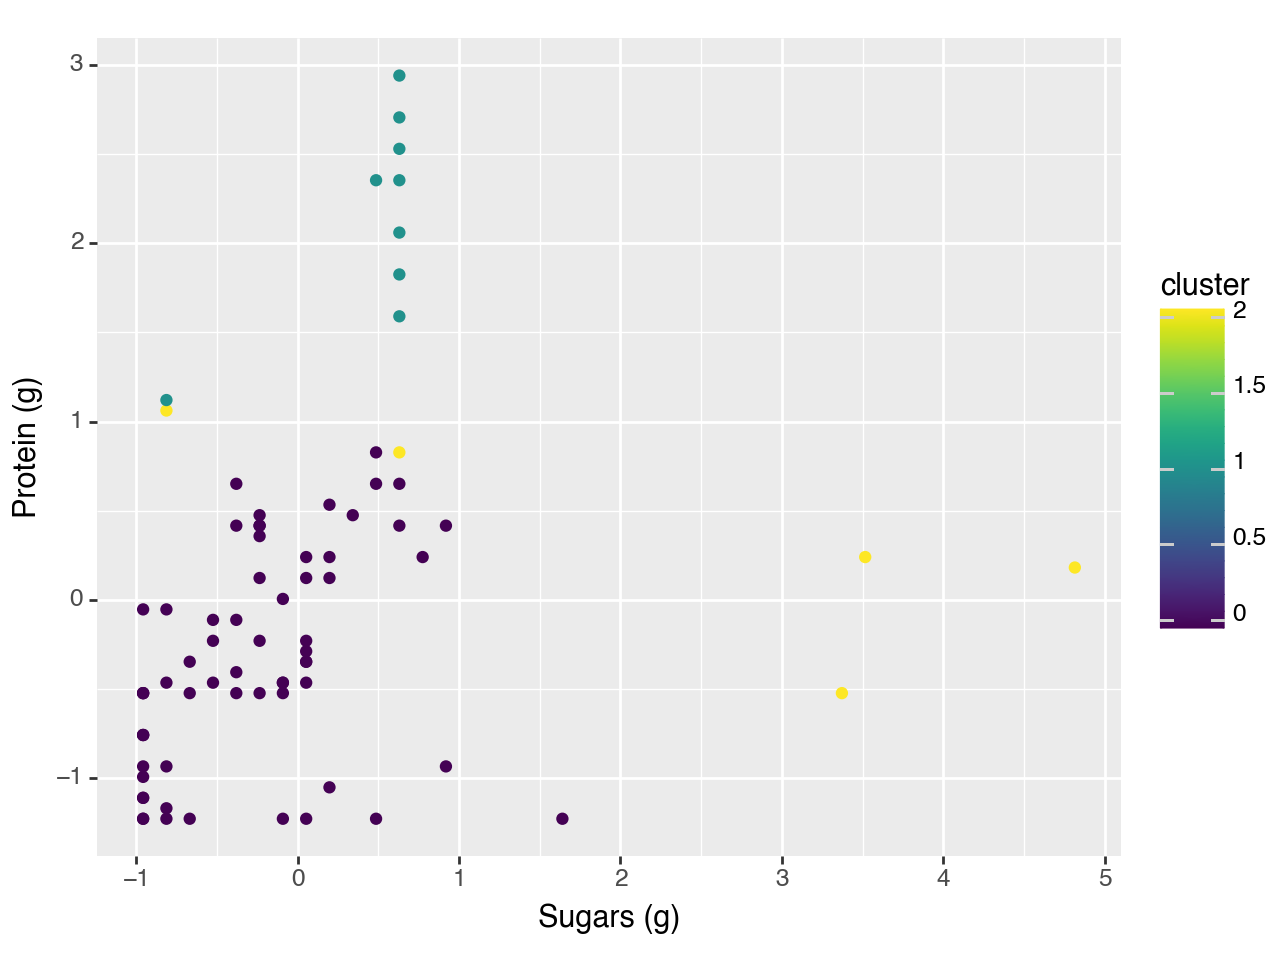

<Figure Size: (640 x 480)>

In [60]:
(ggplot(X, aes(x = "Sugars (g)", y = "Protein (g)", color = "cluster"))) + geom_point()

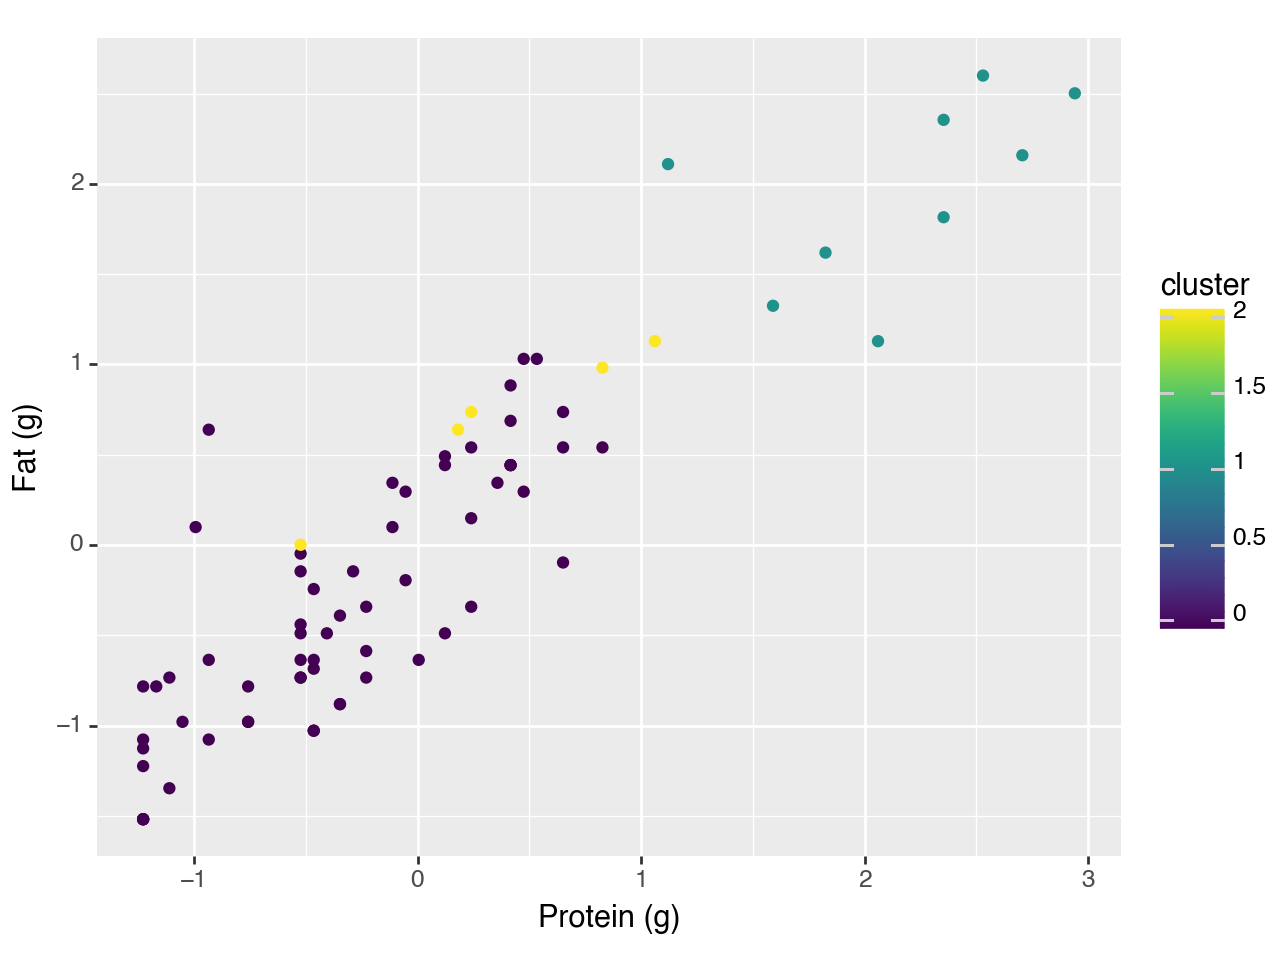

<Figure Size: (640 x 480)>

In [61]:
(ggplot(X, aes(x = "Protein (g)", y = "Fat (g)", color = "cluster"))) + geom_point()